<a href="https://colab.research.google.com/github/txnishq28/Stock-Predictor-Model/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install yfinance seaborn scikit-learn

In [8]:
from google.colab import files
uploaded = files.upload()



Saving Stock_Price_Dataset.csv to Stock_Price_Dataset (1).csv


In [9]:
import pandas as pd

# Load the CSV into a DataFrame
df = pd.read_csv("Stock_Price_Dataset.csv")

# View the first few rows
df.head()


Stock        Date    Open   Price    Risk
0  AAPL  2023-07-03  143.44  144.81  medium
1  AAPL  2023-07-04  152.98  154.90  medium
2  AAPL  2023-07-05  153.10  152.65  medium
3  AAPL  2023-07-06  162.09  158.53  medium
4  AAPL  2023-07-07  160.78  162.31  medium

In [10]:
### Coverting Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

###  Sorting
df = df.sort_values('Date')


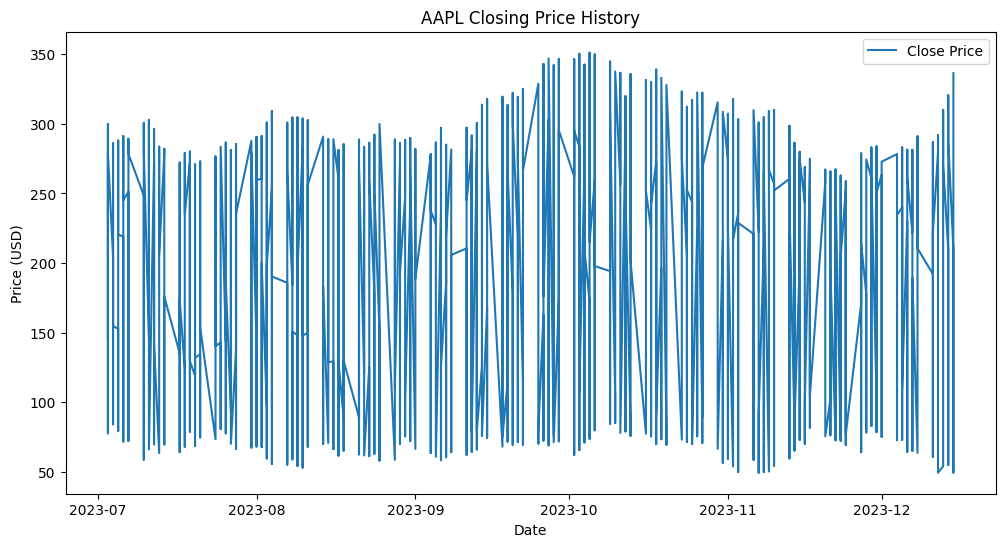

In [11]:
### Visualize the Closing price
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Price'], label='Close Price')
plt.title("AAPL Closing Price History")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [12]:
### Filtering the Price Column for modeling
data = df.filter(['Price'])
dataset = data.values  # convert to numpy array

# 95% training data
import numpy as np
training_data_len = int(np.ceil(len(dataset) * 0.95))


In [13]:
### Scaling the Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [14]:
### Training the Data for LSTM

train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape: [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [15]:
### Now Lets Build the Model
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Initialize the model
model = Sequential()

# First LSTM layer (return sequences so it can go into another LSTM)
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Second LSTM layer
model.add(LSTM(50, return_sequences=False))

# Dense layers
model.add(Dense(25))
model.add(Dense(1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [17]:
model.fit(x_train, y_train, batch_size=1, epochs=5)


Epoch 1/5
1080/1080 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 45s 30ms/step - loss: 0.0778
Epoch 2/5
1080/1080 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 32s 30ms/step - loss: 0.0683
Epoch 3/5
1080/1080 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 29ms/step - loss: 0.0708
Epoch 4/5
1080/1080 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 40s 28ms/step - loss: 0.0693
Epoch 5/5
1080/1080 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 43s 29ms/step - loss: 0.0680


In [18]:
# Create test data
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]  # actual prices

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert and reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 358ms/step


In [19]:
### Create the test data
test_data = scaled_data[training_data_len - 60:, :]

x_test = []
y_test = dataset[training_data_len:, :]  ### actual price values (not scaled)

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

### Convert and reshape for LSTM
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  ### unscale the predictions


2/2 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step


In [20]:
import numpy as np
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)


RMSE: 77.77185959073414


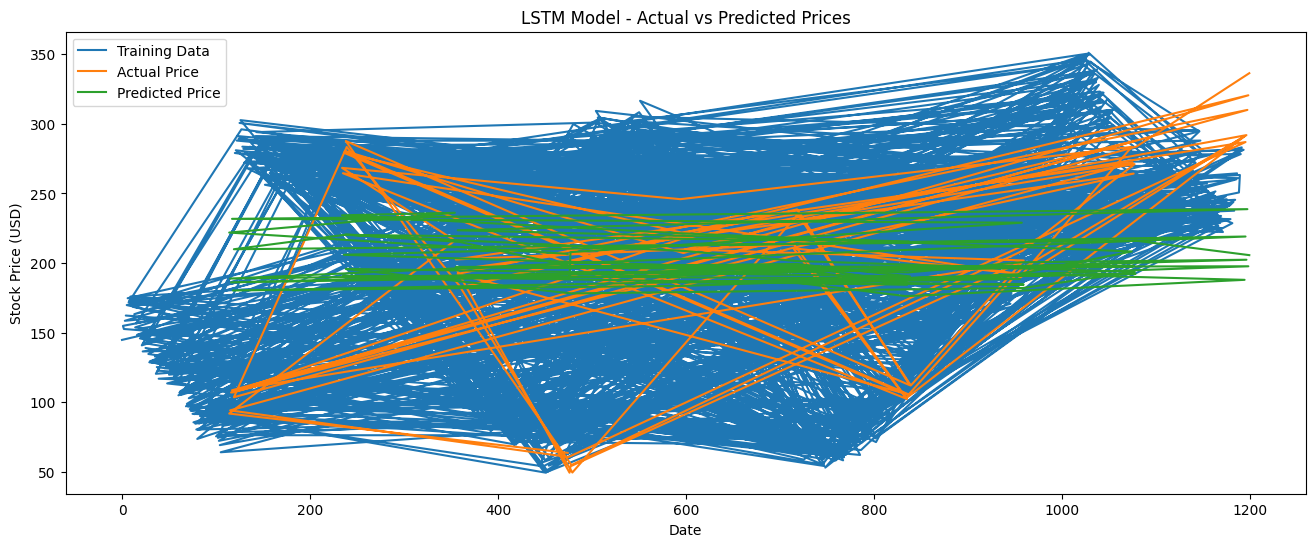

In [21]:
# Recreate the original 'data' DataFrame and split it
train = data[:training_data_len]
valid = data[training_data_len:].copy()

# Add the predictions to the valid set
valid['Predictions'] = predictions

# Plot everything
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.title('LSTM Model - Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.plot(train['Price'], label='Training Data')
plt.plot(valid['Price'], label='Actual Price')
plt.plot(valid['Predictions'], label='Predicted Price')
plt.legend()
plt.show()


In [22]:
valid.tail(10)



Price  Predictions
599   209.81   186.146759
959   201.85   184.531876
839   112.08   185.430557
719   235.06   197.740616
479    49.60   197.396317
359   183.65   215.182144
239   283.32   220.461685
119   103.65   209.917633
1079  283.63   215.991684
1199  336.31   205.677963

In [23]:
# Start with last 60 days from the scaled data
last_60_days = scaled_data[-60:]
future_predictions = []

input_sequence = last_60_days.reshape(1, 60, 1)

# Predict next 7 days
for _ in range(7):
    next_price = model.predict(input_sequence)[0][0]
    future_predictions.append(next_price)

    # Update the input sequence: drop the first, add the new one
    input_sequence = np.append(input_sequence[:, 1:, :], [[[next_price]]], axis=1)

# Reverse the scaling to get real price values
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Display the results
for i, price in enumerate(future_predictions, 1):
    print(f"Day {i}: ${price[0]:.2f}")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 73ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
Day 1: $185.45
Day 2: $181.89
Day 3: $184.41
Day 4: $188.27
Day 5: $191.67
Day 6: $194.17
Day 7: $195.85


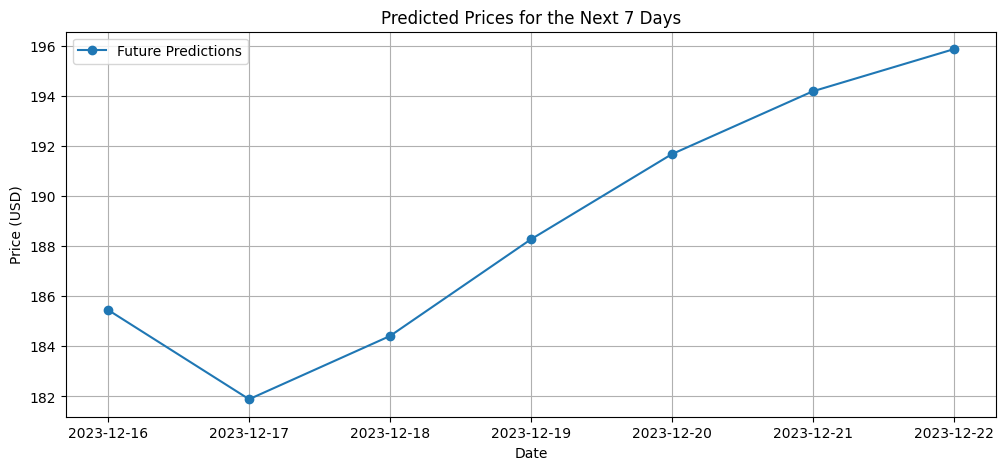

In [24]:
import datetime

last_date = df['Date'].iloc[-1]
future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, 8)]

# Plot
plt.figure(figsize=(12, 5))
plt.plot(future_dates, future_predictions, marker='o', label='Future Predictions')
plt.title('Predicted Prices for the Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


In [25]:
from google.colab import files
uploaded = files.upload()



Saving Stock_Price_Dataset.csv to Stock_Price_Dataset (2).csv


In [26]:
import pandas as pd

# Use the actual filename you uploaded (from above)
df = pd.read_csv("Stock_Price_Dataset.csv")  # no /mnt/data here
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Check available stocks
df['Stock'].unique()


array(['AAPL', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'META', 'BABA', 'NFLX',
       'JPM', 'MSFT'], dtype=object)

In [27]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Dropdown for stock selection
stock_dropdown = widgets.Dropdown(
    options=df['Stock'].unique().tolist(),
    description='Select Stock:',
    value=df['Stock'].unique()[0],
    style={'description_width': 'initial'}
)

# Button to trigger prediction
run_button = widgets.Button(description='Run Prediction üöÄ', button_style='success')

# Output area to display results
output = widgets.Output()

# Display all
display(stock_dropdown, run_button, output)



Dropdown(description='Select Stock:', options=('AAPL', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'META', 'BABA', 'NFLX'‚Ä¶

Button(button_style='success', description='Run Prediction üöÄ', style=ButtonStyle())

Output()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import datetime

def predict_next_7_days(selected_stock):
    print(f"üìà Predicting future prices for: {selected_stock}")

    # Filter stock data
    stock_df = df[df['Stock'] == selected_stock].copy()
    stock_df = stock_df.sort_values('Date')

    # Use only closing price
    data = stock_df[['Price']]
    dataset = data.values

    # Scale and split
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    training_data_len = int(len(dataset) * 0.95)

    train_data = scaled_data[:training_data_len]
    x_train, y_train = [], []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build and train LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=1, verbose=0)

    # Predict next 7 days
    last_60 = scaled_data[-60:]
    input_seq = last_60.reshape(1, 60, 1)
    future_preds = []

    for _ in range(7):
        pred = model.predict(input_seq, verbose=0)[0][0]
        future_preds.append(pred)
        input_seq = np.append(input_seq[:, 1:, :], [[[pred]]], axis=1)

    future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

    # Create future dates
    last_date = stock_df['Date'].iloc[-1]
    future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, 8)]

    # Plot predictions
    plt.figure(figsize=(12,5))
    plt.plot(future_dates, future_preds, marker='o', label='Future Predictions')
    plt.title(f'{selected_stock} - Predicted Prices (Next 7 Days)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Print values
    for i, price in enumerate(future_preds, 1):
        print(f"Day {i}: ${price[0]:.2f}")


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import ipywidgets as widgets
from IPython.display import display, clear_output

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load data
df = pd.read_csv("Stock_Price_Dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Dropdown + Button UI
stock_dropdown = widgets.Dropdown(
    options=df['Stock'].unique().tolist(),
    value=df['Stock'].unique()[0],
    description='Select Stock:',
    style={'description_width': 'initial'}
)

run_button = widgets.Button(description='Run Prediction üöÄ', button_style='success')
output = widgets.Output()

# Define full prediction pipeline
def predict_and_plot_save(selected_stock):
    clear_output(wait=True)
    display(stock_dropdown, run_button, output)

    with output:
        print(f"üìà Predicting future prices for: {selected_stock}")
        stock_df = df[df['Stock'] == selected_stock].copy()
        stock_df = stock_df.sort_values('Date')

        data = stock_df[['Price']]
        dataset = data.values
        training_data_len = int(len(dataset) * 0.95)

        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(dataset)

        train_data = scaled_data[:training_data_len]
        x_train, y_train = [], []

        for i in range(60, len(train_data)):
            x_train.append(train_data[i-60:i, 0])
            y_train.append(train_data[i, 0])

        x_train, y_train = np.array(x_train), np.array(y_train)
        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

        # LSTM model
        model = Sequential()
        model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
        model.add(LSTM(50, return_sequences=False))
        model.add(Dense(25))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(x_train, y_train, batch_size=1, epochs=1, verbose=0)

        # Predict 7 days
        last_60 = scaled_data[-60:]
        input_seq = last_60.reshape(1, 60, 1)
        future_preds = []

        for _ in range(7):
            pred = model.predict(input_seq, verbose=0)[0][0]
            future_preds.append(pred)
            input_seq = np.append(input_seq[:, 1:, :], [[[pred]]], axis=1)

        future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

        # Create future dates
        last_date = stock_df['Date'].iloc[-1]
        future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, 8)]

        # Plot
        plt.figure(figsize=(12,5))
        plt.plot(future_dates, future_preds, marker='o', label='Future Predictions')
        plt.title(f'{selected_stock} - Predicted Prices (Next 7 Days)')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.grid(True)
        plt.legend()
        plt.show()

        # Save to CSV
        future_df = pd.DataFrame({
            'Date': future_dates,
            'Predicted_Price': future_preds.flatten()
        })
        csv_name = f'{selected_stock}_7Day_Predictions.csv'
        future_df.to_csv(csv_name, index=False)

        print(f"‚úÖ Predictions saved to `{csv_name}`")
        for i, price in enumerate(future_preds, 1):
            print(f"Day {i}: ${price[0]:.2f}")

# Button action
def on_button_click(b):
    predict_and_plot_save(stock_dropdown.value)

run_button.on_click(on_button_click)

# Display UI
display(stock_dropdown, run_button, output)


Dropdown(description='Select Stock:', index=2, options=('AAPL', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'META', 'BABA‚Ä¶

Button(button_style='success', description='Run Prediction üöÄ', style=ButtonStyle())

Output()

In [31]:
def predict_and_plot_save(selected_stock):
    clear_output(wait=True)  # Clear previous output
    display(stock_dropdown, run_button, output)

    print(f"üìà Predicting future prices for: {selected_stock}")

    # Filter stock data
    stock_df = df[df['Stock'] == selected_stock].copy()
    stock_df = stock_df.sort_values('Date')

    # Use only closing price
    data = stock_df[['Price']]
    dataset = data.values

    # Scale and split
    from sklearn.preprocessing import MinMaxScaler
    from keras.models import Sequential
    from keras.layers import Dense, LSTM
    import numpy as np
    import matplotlib.pyplot as plt
    import datetime

    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    training_data_len = int(len(dataset) * 0.95)

    train_data = scaled_data[:training_data_len]
    x_train, y_train = [], []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train, y_train, batch_size=1, epochs=1, verbose=0)

    # Predict next 7 days
    last_60 = scaled_data[-60:]
    input_seq = last_60.reshape(1, 60, 1)
    future_preds = []

    for _ in range(7):
        pred = model.predict(input_seq, verbose=0)[0][0]
        future_preds.append(pred)
        input_seq = np.append(input_seq[:, 1:, :], [[[pred]]], axis=1)

    future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

    # Create future dates
    last_date = stock_df['Date'].iloc[-1]
    future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, 8)]

    # Plot predictions
    plt.figure(figsize=(12,5))
    plt.plot(future_dates, future_preds, marker='o', label='Future Predictions')
    plt.title(f'{selected_stock} - Predicted Prices (Next 7 Days)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Save to CSV
    future_df = pd.DataFrame({
        'Date': future_dates,
        'Predicted_Price': future_preds.flatten()
    })
    csv_name = f'{selected_stock}_7Day_Predictions.csv'
    future_df.to_csv(csv_name, index=False)

    print(f"‚úÖ Predictions saved to `{csv_name}`")
    for i, val in enumerate(future_preds, 1):
        print(f"Day {i}: ${val[0]:.2f}")


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import ipywidgets as widgets
from IPython.display import display, clear_output

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load data
df = pd.read_csv("Stock_Price_Dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Dropdown + Button UI
stock_dropdown = widgets.Dropdown(
    options=df['Stock'].unique().tolist(),
    value=df['Stock'].unique()[0],
    description='Select Stock:',
    style={'description_width': 'initial'}
)

run_button = widgets.Button(description='Run Prediction üöÄ', button_style='success')
output = widgets.Output()

# Define full prediction pipeline
def predict_and_plot_save(selected_stock):
    clear_output(wait=True)
    display(stock_dropdown, run_button, output)

    with output:
        print(f"üìà Predicting future prices for: {selected_stock}")
        stock_df = df[df['Stock'] == selected_stock].copy()
        stock_df = stock_df.sort_values('Date')

        data = stock_df[['Price']]
        dataset = data.values
        training_data_len = int(len(dataset) * 0.95)

        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(dataset)

        train_data = scaled_data[:training_data_len]
        x_train, y_train = [], []

        for i in range(60, len(train_data)):
            x_train.append(train_data[i-60:i, 0])
            y_train.append(train_data[i, 0])

        x_train, y_train = np.array(x_train), np.array(y_train)
        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

        # LSTM model
        model = Sequential()
        model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
        model.add(LSTM(50, return_sequences=False))
        model.add(Dense(25))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(x_train, y_train, batch_size=1, epochs=1, verbose=0)

        # Predict 7 days
        last_60 = scaled_data[-60:]
        input_seq = last_60.reshape(1, 60, 1)
        future_preds = []

        for _ in range(7):
            pred = model.predict(input_seq, verbose=0)[0][0]
            future_preds.append(pred)
            input_seq = np.append(input_seq[:, 1:, :], [[[pred]]], axis=1)

        future_preds = scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

        # Create future dates
        last_date = stock_df['Date'].iloc[-1]
        future_dates = [last_date + datetime.timedelta(days=i) for i in range(1, 8)]

        # Plot
        plt.figure(figsize=(12,5))
        plt.plot(future_dates, future_preds, marker='o', label='Future Predictions')
        plt.title(f'{selected_stock} - Predicted Prices (Next 7 Days)')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.grid(True)
        plt.legend()
        plt.show()

        # Save to CSV
        future_df = pd.DataFrame({
            'Date': future_dates,
            'Predicted_Price': future_preds.flatten()
        })
        csv_name = f'{selected_stock}_7Day_Predictions.csv'
        future_df.to_csv(csv_name, index=False)

        print(f"‚úÖ Predictions saved to `{csv_name}`")
        for i, price in enumerate(future_preds, 1):
            print(f"Day {i}: ${price[0]:.2f}")

# Button action
def on_button_click(b):
    predict_and_plot_save(stock_dropdown.value)

run_button.on_click(on_button_click)

# Display UI
display(stock_dropdown, run_button, output)


Dropdown(description='Select Stock:', options=('AAPL', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'META', 'BABA', 'NFLX'‚Ä¶

Button(button_style='success', description='Run Prediction üöÄ', style=ButtonStyle())

Output()

In [33]:
%%javascript
IPython.notebook.metadata.widgets = {}


<IPython.core.display.Javascript object>